In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 1. Membaca dataset
df1 = pd.read_excel(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 9_Global Sugar Consumption & Production 2021 Dashboard By Alfin Bahru Rahmika Umar\Sugar_World-MarketTrade [CONS 2021].xlsx")
df1

,Country,CONSUMPTION_IN_YEAR_2021
0,India,28500
1,European Union,16750
2,China,15800
3,United States,11000
4,Brazil,10200
5,Indonesia,7500
6,Russia,6000
7,Pakistan,5900
8,Mexico,4192
9,Egypt,3430


In [28]:
df2 = pd.read_excel(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 9_Global Sugar Consumption & Production 2021 Dashboard By Alfin Bahru Rahmika Umar\Sugar_World-MarketTrade [PROD 2021].xlsx")
df2

,Country,PRODUCTION_IN_YEAR_2021
0,Brazil,39920
1,India,34700
2,European Union,15800
3,Thailand,10603
4,China,10600
5,United States,8446
6,Pakistan,6840
7,Mexico,6158
8,Russia,6100
9,Australia,4400


In [29]:
# Menampilkan informasi dasar
print("Dimensi awal dataset CONSUMPTIONS:", df1.shape)
print("Dimensi awal dataset PRODUCTIONS:", df2.shape)

Dimensi awal dataset CONSUMPTIONS: (25, 2)
Dimensi awal dataset PRODUCTIONS: (25, 2)


In [30]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   25 non-null     object
 1   CONSUMPTION_IN_YEAR_2021  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


,CONSUMPTION_IN_YEAR_2021
count,25.000000
mean,5613.080000
std,6465.122014
min,1595.000000
25%,1900.000000
50%,2560.000000
75%,6000.000000
max,28500.000000


In [31]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  25 non-null     object
 1   PRODUCTION_IN_YEAR_2021  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


,PRODUCTION_IN_YEAR_2021
count,25.000000
mean,6832.600000
std,9946.065851
min,830.000000
25%,1550.000000
50%,2700.000000
75%,6840.000000
max,39920.000000


In [32]:
# Merge kedua dataset berdasarkan 'Country'
df = pd.merge(df1, df2, on='Country', how='inner')
print("\nMerged Dataframe:")
print(df.head())


Merged Dataframe:
          Country  CONSUMPTION_IN_YEAR_2021  PRODUCTION_IN_YEAR_2021
0           India                     28500                    34700
1  European Union                     16750                    15800
2           China                     15800                    10600
3   United States                     11000                     8446
4          Brazil                     10200                    39920


In [33]:
# Salin dataframe untuk perbandingan data sebelum dan sesudah cleaning
df_before = df.copy()

In [34]:
### DETEKSI DAN PENGHAPUSAN DATA YANG BERMASALAH ###

# 1. Duplikat
print("\nJumlah duplikat sebelum cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah duplikat setelah cleaning:", df.duplicated().sum())

# 2. Missing values
print("\nMissing values sebelum cleaning:")
print(df.isnull().sum())
df = df.dropna()
print("\nMissing values setelah cleaning:")
print(df.isnull().sum())

# 3. Deteksi outliers menggunakan IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


Jumlah duplikat sebelum cleaning: 0
Jumlah duplikat setelah cleaning: 0

Missing values sebelum cleaning:
Country                     0
CONSUMPTION_IN_YEAR_2021    0
PRODUCTION_IN_YEAR_2021     0
dtype: int64

Missing values setelah cleaning:
Country                     0
CONSUMPTION_IN_YEAR_2021    0
PRODUCTION_IN_YEAR_2021     0
dtype: int64


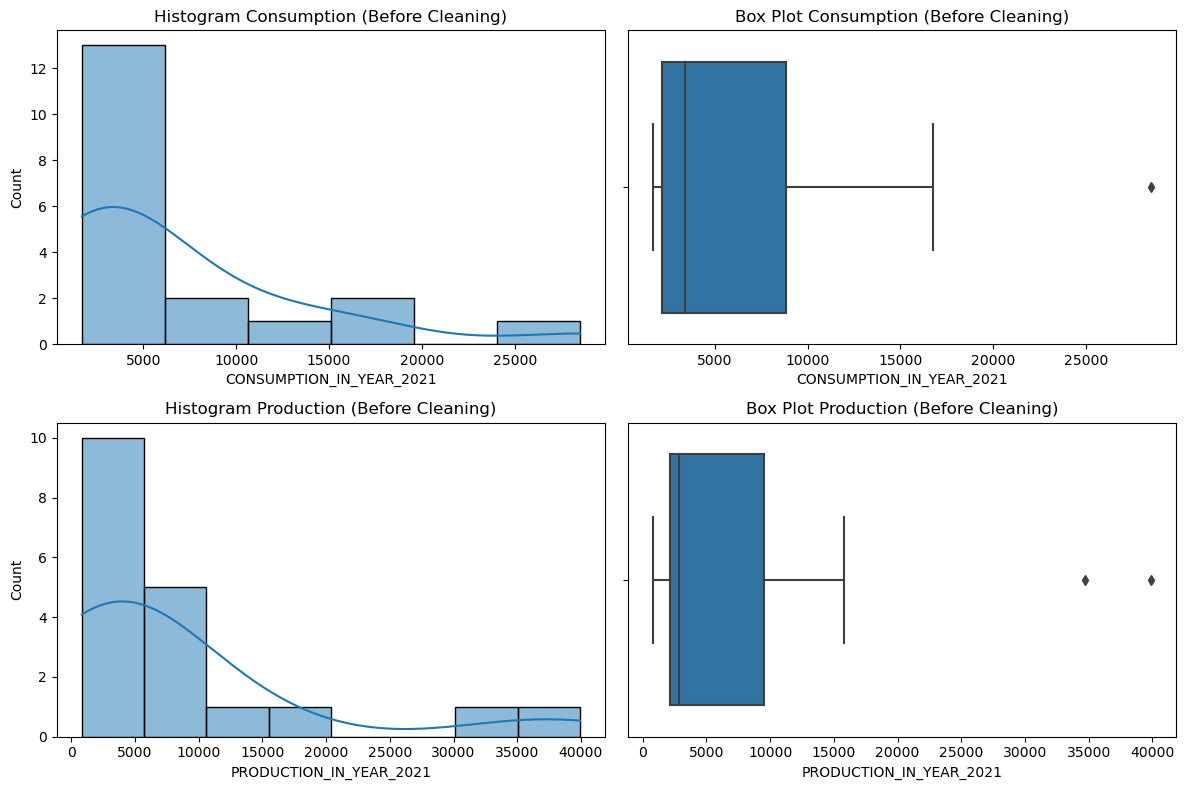

In [35]:
# Sebelum menghapus outliers, visualisasikan distribusi masing-masing kolom
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df['CONSUMPTION_IN_YEAR_2021'], ax=axes[0,0], kde=True)
axes[0,0].set_title('Histogram Consumption (Before Cleaning)')
sns.boxplot(x=df['CONSUMPTION_IN_YEAR_2021'], ax=axes[0,1])
axes[0,1].set_title('Box Plot Consumption (Before Cleaning)')
sns.histplot(df['PRODUCTION_IN_YEAR_2021'], ax=axes[1,0], kde=True)
axes[1,0].set_title('Histogram Production (Before Cleaning)')
sns.boxplot(x=df['PRODUCTION_IN_YEAR_2021'], ax=axes[1,1])
axes[1,1].set_title('Box Plot Production (Before Cleaning)')
plt.tight_layout()
plt.show()

In [36]:
# Hapus outliers untuk masing-masing kolom
df_cleaned = remove_outliers(df, 'CONSUMPTION_IN_YEAR_2021')
df_cleaned = remove_outliers(df_cleaned, 'PRODUCTION_IN_YEAR_2021')

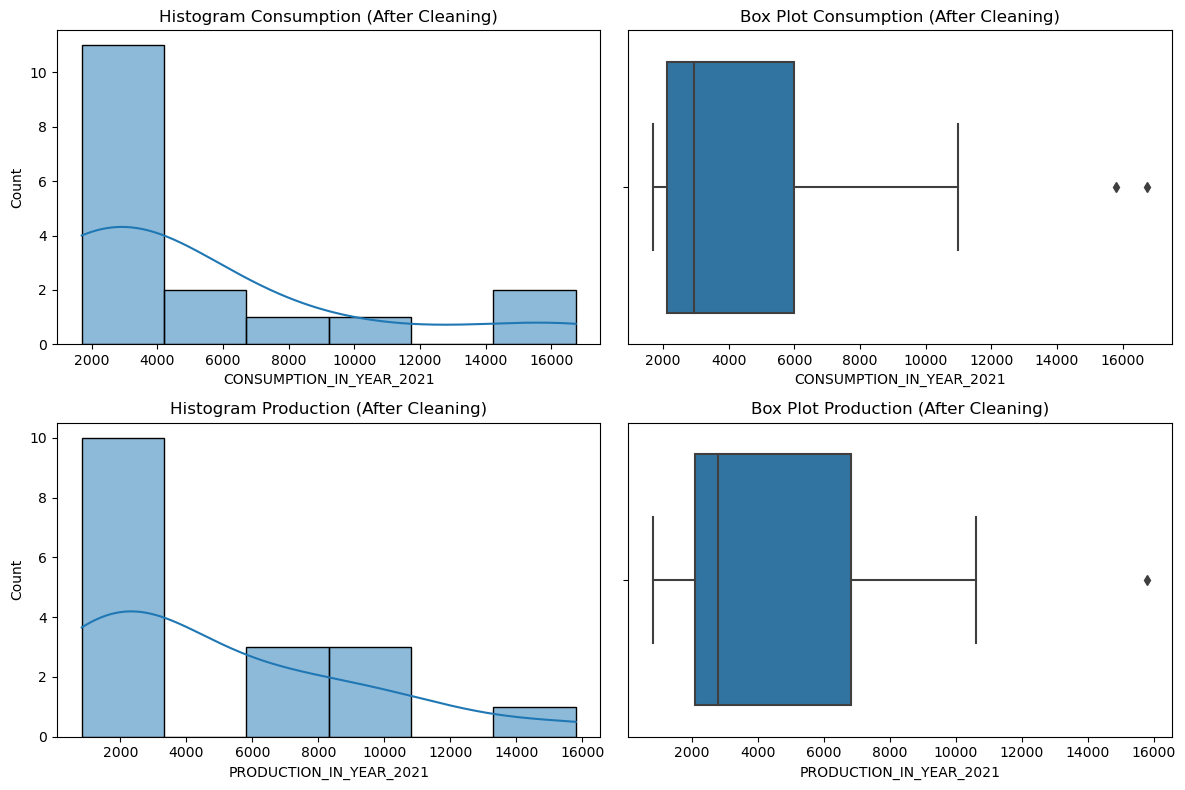

In [37]:
# Visualisasikan data setelah cleaning
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df_cleaned['CONSUMPTION_IN_YEAR_2021'], ax=axes[0,0], kde=True)
axes[0,0].set_title('Histogram Consumption (After Cleaning)')
sns.boxplot(x=df_cleaned['CONSUMPTION_IN_YEAR_2021'], ax=axes[0,1])
axes[0,1].set_title('Box Plot Consumption (After Cleaning)')
sns.histplot(df_cleaned['PRODUCTION_IN_YEAR_2021'], ax=axes[1,0], kde=True)
axes[1,0].set_title('Histogram Production (After Cleaning)')
sns.boxplot(x=df_cleaned['PRODUCTION_IN_YEAR_2021'], ax=axes[1,1])
axes[1,1].set_title('Box Plot Production (After Cleaning)')
plt.tight_layout()
plt.show()

In [38]:
# Bandingkan jumlah data sebelum dan sesudah cleaning
print("\nJumlah data sebelum cleaning:", df_before.shape)
print("Jumlah data sesudah cleaning:", df_cleaned.shape)

# Simpan dataset yang sudah dibersihkan ke CSV
df_cleaned.to_csv('Sugar_World-MarketTrade_CLEANED.csv', index=False)


Jumlah data sebelum cleaning: (19, 3)
Jumlah data sesudah cleaning: (17, 3)


In [39]:
# Hitung metrik-metrik
num_countries = df_cleaned['Country'].nunique()
total_production = df_cleaned['PRODUCTION_IN_YEAR_2021'].sum()
total_consumption = df_cleaned['CONSUMPTION_IN_YEAR_2021'].sum()

print("Number Of Sugar-Producing Countries:", num_countries)
print("Total Production (In Metric Tons):", total_production)
print("Total Consumption (In Metric Tons):", total_consumption)

Number Of Sugar-Producing Countries: 17
Total Production (In Metric Tons): 83746
Total Consumption (In Metric Tons): 90282


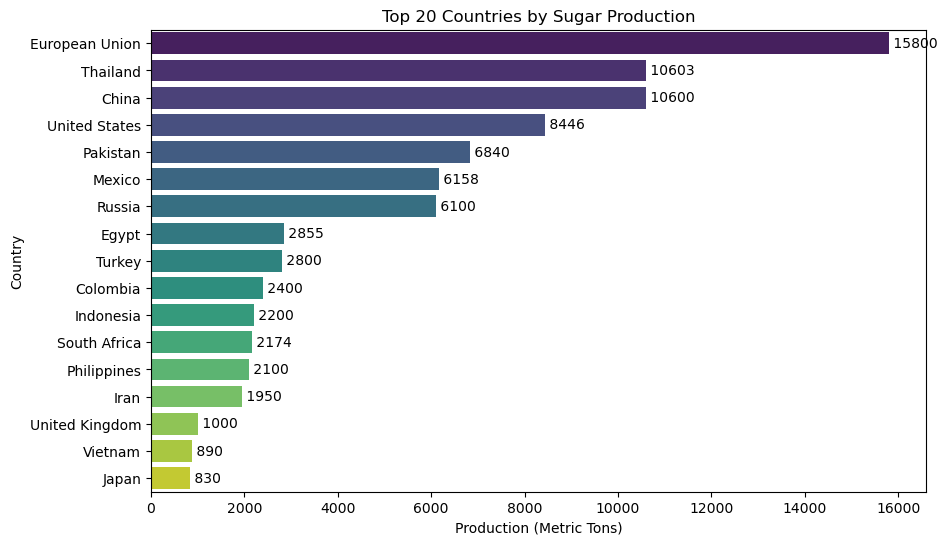

In [40]:
# Bar Chart 20 negara dengan produksi gula tertinggi
df_prod_top20 = df_cleaned.nlargest(20, 'PRODUCTION_IN_YEAR_2021')
plt.figure(figsize=(10,6))
sns.barplot(data=df_prod_top20, x='PRODUCTION_IN_YEAR_2021', y='Country', palette='viridis')
plt.title('Top 20 Countries by Sugar Production')
for index, value in enumerate(df_prod_top20['PRODUCTION_IN_YEAR_2021']):
    plt.text(value, index, f' {value}', va='center')
plt.xlabel('Production (Metric Tons)')
plt.ylabel('Country')
plt.show()

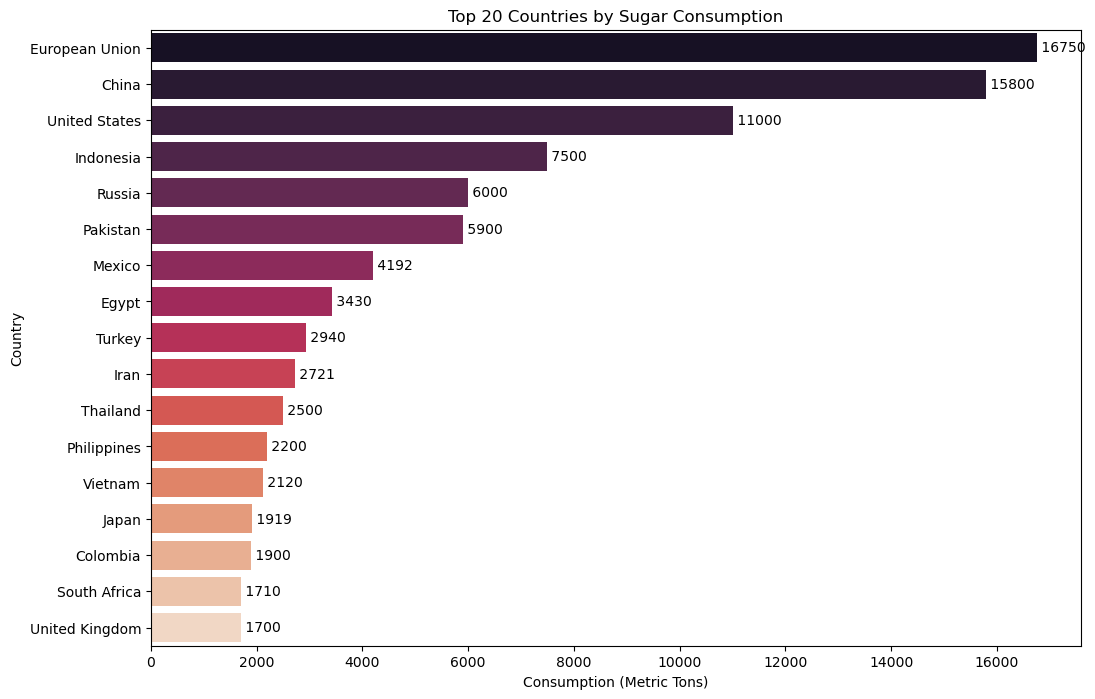

In [41]:
# Bar Chart 20 negara dengan konsumsi gula tertinggi
df_cons_top20 = df_cleaned.nlargest(20, 'CONSUMPTION_IN_YEAR_2021')
plt.figure(figsize=(12,8))
sns.barplot(data=df_cons_top20, x='CONSUMPTION_IN_YEAR_2021', y='Country', palette='rocket')
plt.title('Top 20 Countries by Sugar Consumption')
for index, value in enumerate(df_cons_top20['CONSUMPTION_IN_YEAR_2021']):
    plt.text(value, index, f' {value}', va='center')
plt.xlabel('Consumption (Metric Tons)')
plt.ylabel('Country')
plt.show()

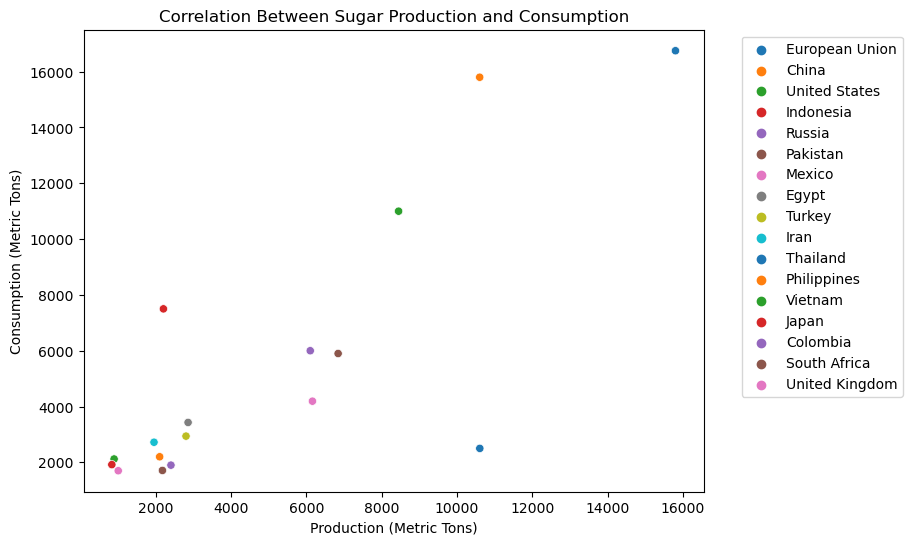

In [42]:
# Scatter Plot korelasi antara produksi dan konsumsi
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='PRODUCTION_IN_YEAR_2021', y='CONSUMPTION_IN_YEAR_2021', hue='Country', palette='tab10')
plt.title('Correlation Between Sugar Production and Consumption')
plt.xlabel('Production (Metric Tons)')
plt.ylabel('Consumption (Metric Tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

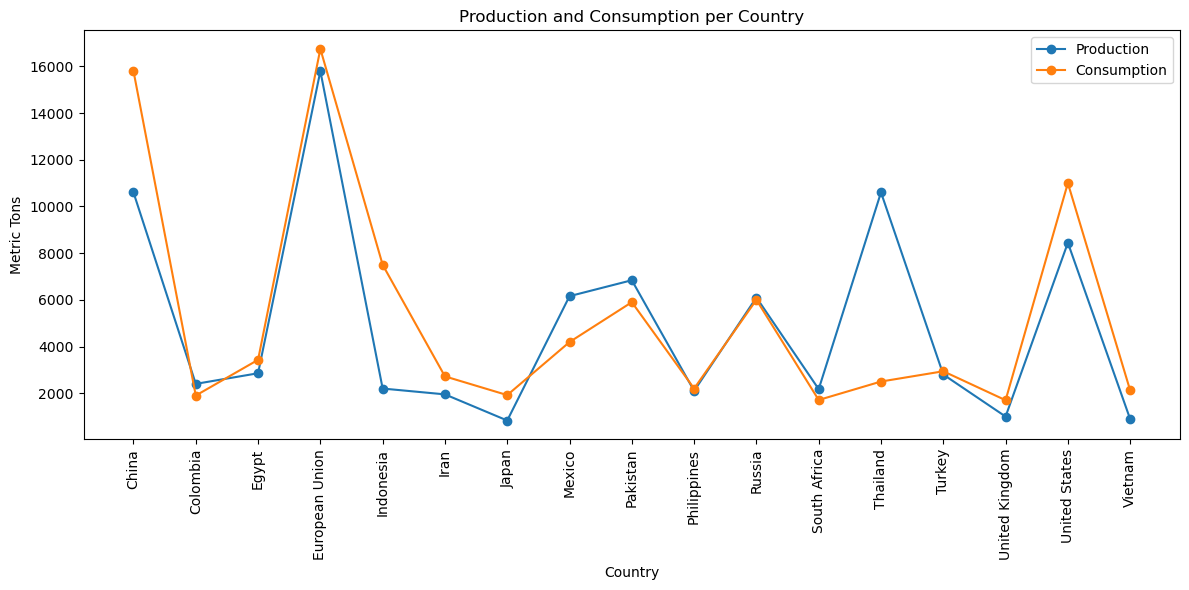

In [43]:
# Line Chart gabungan Produksi dan Konsumsi per Negara
df_sorted = df_cleaned.sort_values('Country')
plt.figure(figsize=(12,6))
plt.plot(df_sorted['Country'], df_sorted['PRODUCTION_IN_YEAR_2021'], marker='o', label='Production')
plt.plot(df_sorted['Country'], df_sorted['CONSUMPTION_IN_YEAR_2021'], marker='o', label='Consumption')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Metric Tons')
plt.title('Production and Consumption per Country')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca dataset yang sudah dibersihkan
# df = pd.read_csv('Sugar_World-MarketTrade_CLEANED.csv')

# st.title("Dashboard Sugar Market Trade 2021")
# st.header("Metrik Utama")
# num_countries = df['Country'].nunique()
# total_production = df['PRODUCTION_IN_YEAR_2021'].sum()
# total_consumption = df['CONSUMPTION_IN_YEAR_2021'].sum()

# st.write("**Number Of Sugar-Producing Countries:**", num_countries)
# st.write("**Total Production (In Metric Tons):**", total_production)
# st.write("**Total Consumption (In Metric Tons):**", total_consumption)

# # Bar Chart Produksi Top 20
# df_prod_top20 = df.nlargest(20, 'PRODUCTION_IN_YEAR_2021')
# fig1, ax1 = plt.subplots(figsize=(10,6))
# sns.barplot(data=df_prod_top20, x='PRODUCTION_IN_YEAR_2021', y='Country', palette='viridis', ax=ax1)
# ax1.set_title('Top 20 Countries by Sugar Production')
# for index, value in enumerate(df_prod_top20['PRODUCTION_IN_YEAR_2021']):
#     ax1.text(value, index, f' {value}', va='center')
# st.pyplot(fig1)

# # Bar Chart Konsumsi Top 20
# df_cons_top20 = df.nlargest(20, 'CONSUMPTION_IN_YEAR_2021')
# fig2, ax2 = plt.subplots(figsize=(10,6))
# sns.barplot(data=df_cons_top20, x='CONSUMPTION_IN_YEAR_2021', y='Country', palette='rocket', ax=ax2)
# ax2.set_title('Top 20 Countries by Sugar Consumption')
# for index, value in enumerate(df_cons_top20['CONSUMPTION_IN_YEAR_2021']):
#     ax2.text(value, index, f' {value}', va='center')
# st.pyplot(fig2)

# # Scatter Plot korelasi
# fig3, ax3 = plt.subplots(figsize=(8,6))
# sns.scatterplot(data=df, x='PRODUCTION_IN_YEAR_2021', y='CONSUMPTION_IN_YEAR_2021', hue='Country', palette='tab10', ax=ax3)
# ax3.set_title('Correlation Between Sugar Production and Consumption')
# ax3.set_xlabel('Production (Metric Tons)')
# ax3.set_ylabel('Consumption (Metric Tons)')
# st.pyplot(fig3)

# # Line Chart Produksi dan Konsumsi per Negara
# df_sorted = df.sort_values('Country')
# fig4, ax4 = plt.subplots(figsize=(12,6))
# ax4.plot(df_sorted['Country'], df_sorted['PRODUCTION_IN_YEAR_2021'], marker='o', label='Production')
# ax4.plot(df_sorted['Country'], df_sorted['CONSUMPTION_IN_YEAR_2021'], marker='o', label='Consumption')
# ax4.set_xticklabels(df_sorted['Country'], rotation=45)
# ax4.set_xlabel('Country')
# ax4.set_ylabel('Metric Tons')
# ax4.set_title('Production and Consumption per Country')
# ax4.legend()
# st.pyplot(fig4)
